# **Lab 1 - Filters and Convolution**
# **Computer Vision (10224)**
<img src='https://upload.wikimedia.org/wikipedia/he/thumb/9/94/%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg/560px-%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg'></img>	
## **Goals**
* Understanding filters
  1. Low Pass Filter(LPF).
  2. High Pass Filter(HPF).
  3. Edge Detection.
* Implementing 2D Convolution.
* Importance of metrics in computer vision.
* Understanding the importance of numpy.

## **Lab Session**
  1. Lab 0 Recap.
  2. Anaconda installation and insights.
  3. Implementations of Filters and trying them with scipy conv2d implementation.
    * HPF.
    * LFP.
    * SobelX/Y
  4. Implementing 2D Convolution(Conv2D).
  5. Implementing Mean Square Error(MSE).

## **Final Report**
  1. Complete the unfinished lab session tasks.
  2. Run Conv2D(what you implemented) with your filters and measure the MSE between your conv2d implementation and the one from scipy you should receive low errors.
  3. Read the Canny Edge Detection OpenCV documentation  and use it on messi's and the zebra image using the default parameters, show your results in the final report.
  4. Write a short TL;DR (too long didn’t read) summary on the TL;DR text cell 2Dand describe your solution and what you understood in the lab.

## **Guidelines**
  1. Code written in the assignments MUST follow the PEP-8 guidelines, we will deduct points of code not following this guideline, points will be accumulated.
  2. You may use either Google Colab or Local Jupyter notebook session.
  3. Use Markdown cells in-between your code cells to explain what you’ve done.
  4. Assignments must be submitted as .html with all the required plots.
Some exercises will require online reading, you may use Google and stackoverflow for inspiration, although if you use it make sure to attach the reference link. 
  5. Add as much comments you need to explain yourself, you wouldn’t want to assume we fully understand your
intuition.
  6. Code should be well ordered, formatted and readable.


###TL;DR - To Long Didn't Read

###### Imports and Configurations

In [2]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
from scipy.signal import convolve, convolve2d, correlate2d

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# root_dir = "/content/gdrive/My Drive/AfekaCV"

Mounted at /content/gdrive


In [2]:
import os
#GOOGLE_DRIVE_PATH_AFTER_MY_DRIVE = './PIC1.jpg'  # TODO - change path!
#print(os.listdir(GOOGLE_DRIVE_PATH_AFTER_MY_DRIVE))

In [3]:
#os.listdir(GOOGLE_DRIVE_PATH_AFTER_MY_DRIVE)

['EXERCISE.md',
 'filters and convolution.pdf',
 'filters and convolution.pptx',
 'LAB_1_ComputerVision.ipynb',
 'LAB_1_ComputerVision_new.ipynb',
 'LAB_1_ComputerVision_template.html',
 'myConv2d.py',
 'myConv2dSolved.py',
 'panda.jpg',
 'zebra.jpg',
 '__pycache__']

In [ ]:
# import sys 
# sys.path.append(GOOGLE_DRIVE_PATH)

In [ ]:
# !wget http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg -O messi.jpg

--2022-02-20 17:11:28--  http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg
Resolving www.turtleluck.com (www.turtleluck.com)... 185.146.22.247
Connecting to www.turtleluck.com (www.turtleluck.com)|185.146.22.247|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37353 (36K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  36.48K  --.-KB/s    in 0.1s    

2022-02-20 17:11:29 (375 KB/s) - ‘messi.jpg’ saved [37353/37353]



In [ ]:
# !ls

gdrive	messi.jpg  sample_data


###### Input image
in the cell below we load an image with open-cv

Text(0.5, 1.0, 'Uncharted image')

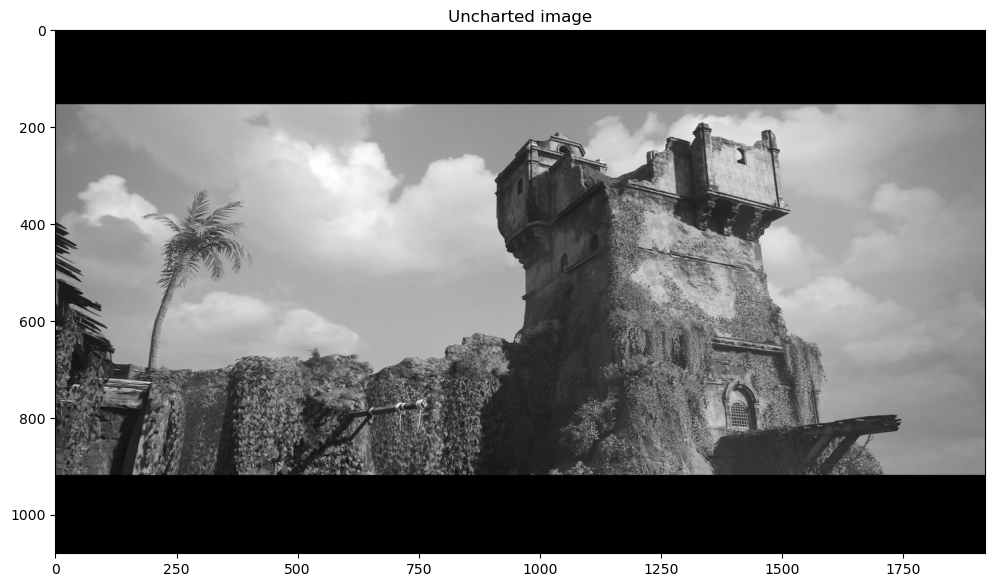

In [3]:
img = cv2.imread('./PIC1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12, 8))
plt.imshow(img, cmap='gray')
plt.title('Uncharted image')

## Filters Review 

LPF, HPF  &  Sharpen 
Including usage examples with open-cv


### LPF:

 **{KxK} Averaging filter,  K = 2n+1,  n integer**
\begin{equation}
\frac{1}{k^2}\times
\begin{bmatrix}
1  & 1& ... & 1 & 1 \\
1  & 1&  ... & 1 & 1  \\
.  & .&  ...  & ...& .  \\
. & ...  &  ... & ...& . \\
. & ...  & ... & ...& . \\
1 & 1  & ... & 1& 1 \\
1 & 1 &...&1 & 1\\
\end{bmatrix}
\end{equation}

**example:a 3x3 Avraging filter (k=3):**
\begin{equation}
\frac{1}{3^2}\times
\begin{bmatrix}1 & 1 & 1 \\
1 & 1 & 1\\
1 & 1 & 1\\
\end{bmatrix}
\end{equation}
 **LPFs are Mainly used to smooth images.**<br>
 **The sum of the filters coefficient has to be one.**<br>

#### Usage Example with open-cv 

#### Your Task: Apply avarging low pass filter on messi's image 


Text(0.5, 1.0, 'Original Image')

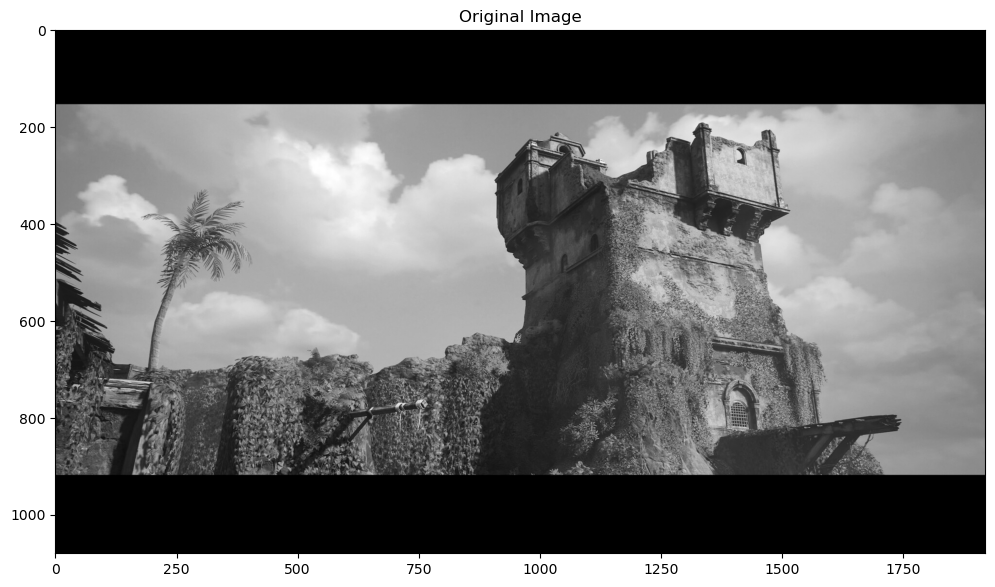

In [9]:

## Using Blur Function
lpf_img = cv2.blur(img, (5, 5))

# Display the result
plt.figure(figsize=(12, 8))
plt.imshow(img, cmap='gray')
plt.title("Original Image")



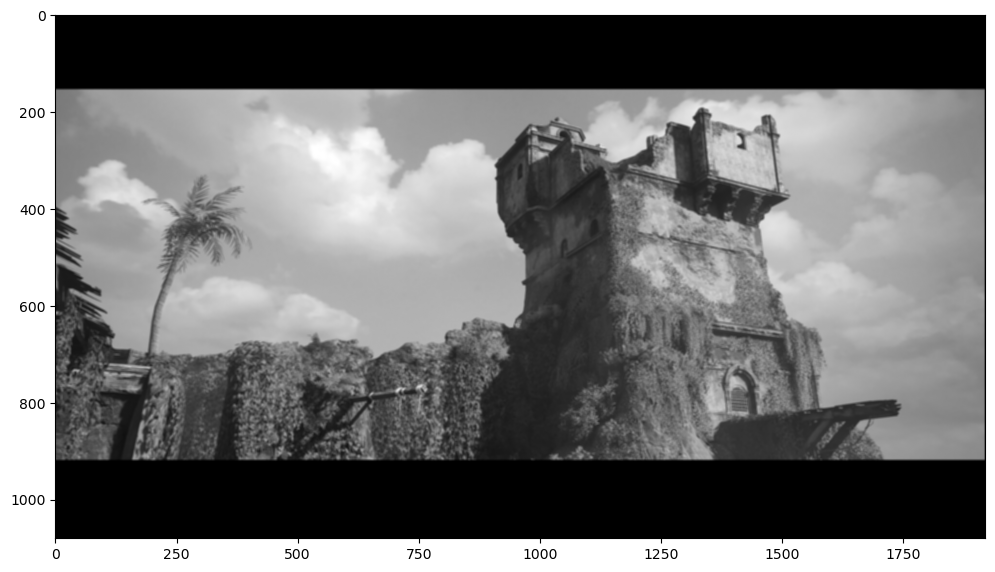

In [20]:
size = 5
smallBlur = np.ones((size, size), dtype="float") * (1.0 / (size**2))
blurred_img = convolve2d(img, smallBlur, mode="same")
plt.figure(figsize=(12, 8))

plt.imshow(blurred_img, cmap="gray")

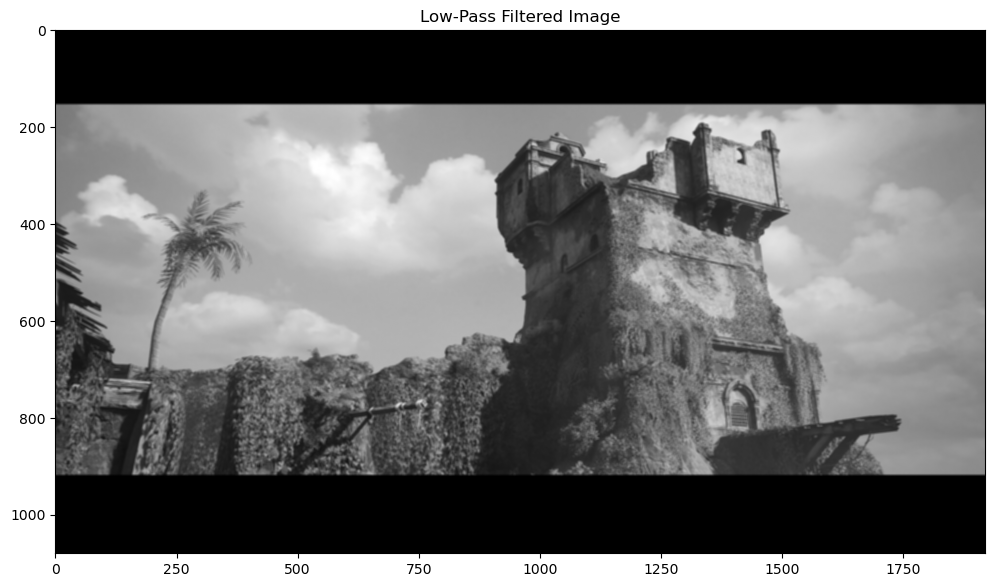

In [12]:
plt.figure(figsize=(12, 8))
plt.imshow(lpf_img, cmap='gray')
plt.title("Low-Pass Filtered Image")

plt.show()# Your code goes here

#### Solution apply Avarging LPF  on messi's image: 

In [13]:
size = 3
smallBlur = np.ones((size, size), dtype="float") * (1.0 / (size**2))
blurred_img = convolve2d(img, smallBlur, mode="same")
resultimage = cv2.filter2D(img, -1, smallBlur)


In [15]:
cv2.BORDER_DEFAULT

4

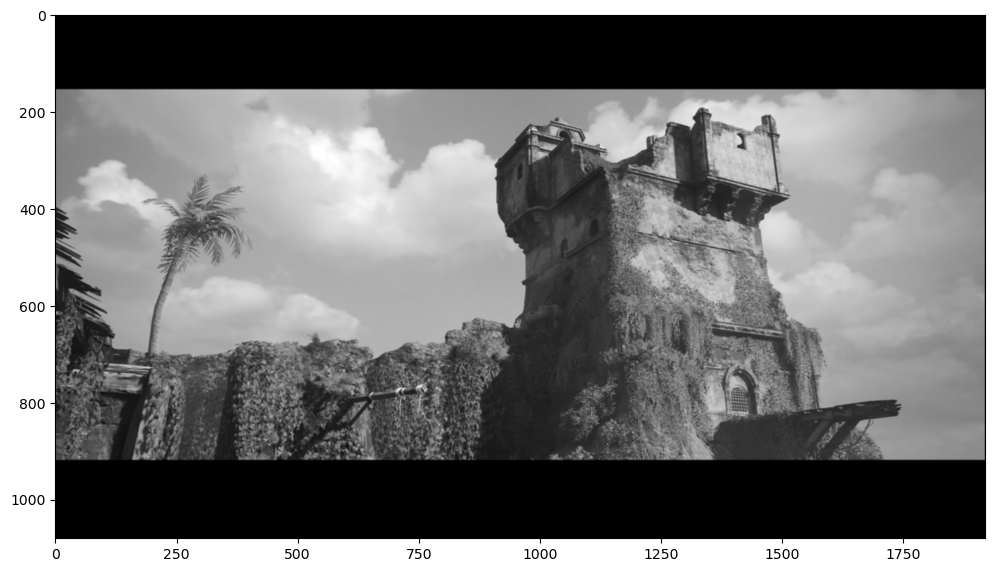

In [17]:
plt.figure(figsize=(12, 8))

plt.imshow(blurred_img, cmap="gray")

In [18]:
resultimage.shape, blurred_img.shape

((1080, 1920), (1080, 1920))

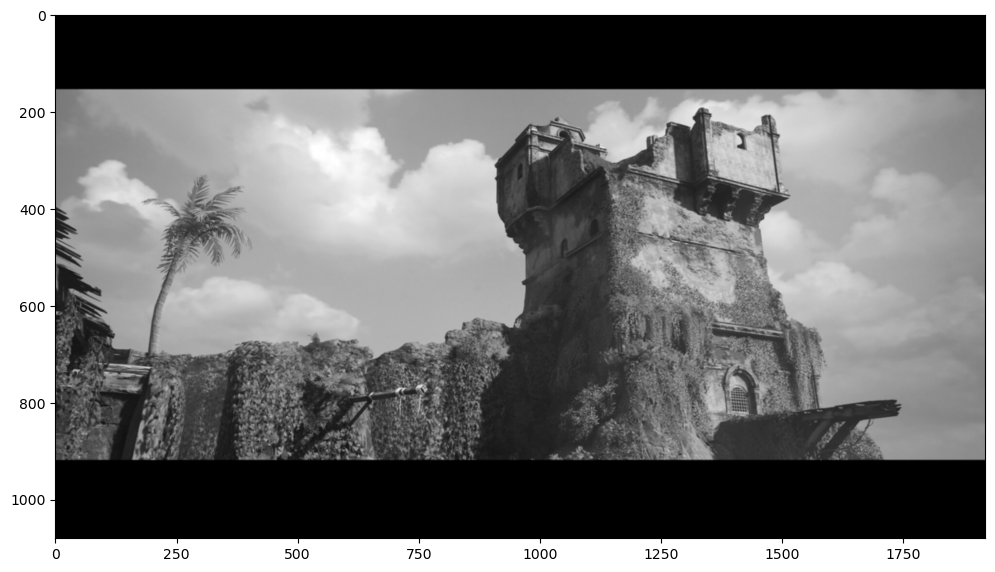

In [19]:
plt.figure(figsize=(12, 8))

plt.imshow(resultimage, cmap="gray")

#### LPF Expected Result: 
Expected result by applying a 7x7 avarging filter on the image

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.subplot(1, 2, 1)
# plt.imshow(img, cmap="gray")
# plt.title("Original image")
# plt.subplot(1, 2, 2)
# plt.imshow(blurred_img,  cmap="gray")
# plt.title("Blurred image")

### HPF:

*  Laplacian \begin{bmatrix}0 & -1 & 0 \\
-1 & 4 & -1\\
0 & -1 & 0\\
\end{bmatrix}
*   sobelX \begin{bmatrix}-1 & 0 & 1 \\
-2 & 0 & 2\\
-1 & 0 & 1\\
\end{bmatrix}

*   sobelY \begin{bmatrix}-1 & -2 & -1 \\
0 & 0 & 0\\
1 & 2 & 1\\
\end{bmatrix}

 **typically used to find edges in the input image**<br>
 **the sum of the filters coefficient has to be zero**



In [21]:
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

#### Your Task: Apply all HPF mention above on the image





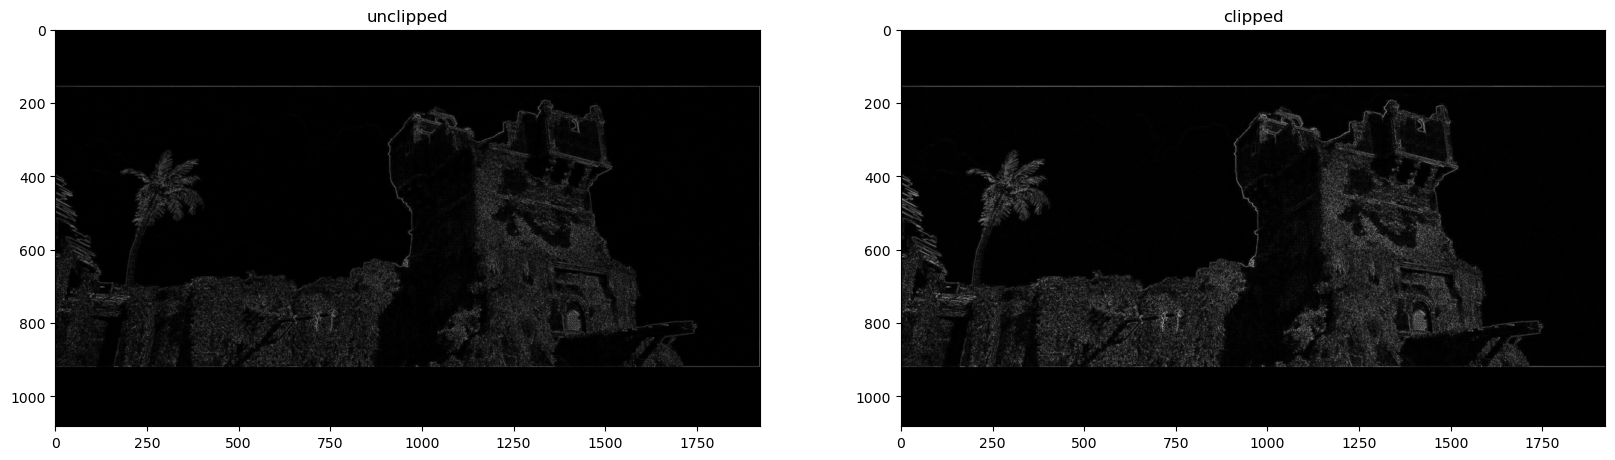

In [23]:
# Your code goes here
lap_img2 = np.abs(convolve2d(img, laplacian))
lap_img_clipped2 = np.clip(lap_img2, a_min=0, a_max=255)
plt.figure(figsize=(20, 10))
plt.subplot(121) # Row X Columns X Index, 1, 2 ,1
plt.title(f"unclipped")
plt.imshow(lap_img2,cmap="gray")
plt.subplot(122)
plt.title("clipped")
plt.imshow(lap_img_clipped2,cmap="gray")

In [44]:
lap_img = np.abs(convolve2d(img, laplacian))
lap_img_clipped = np.clip(lap_img, a_min=0, a_max=255)  # Ensure pixel values are in the valid range (0-255)


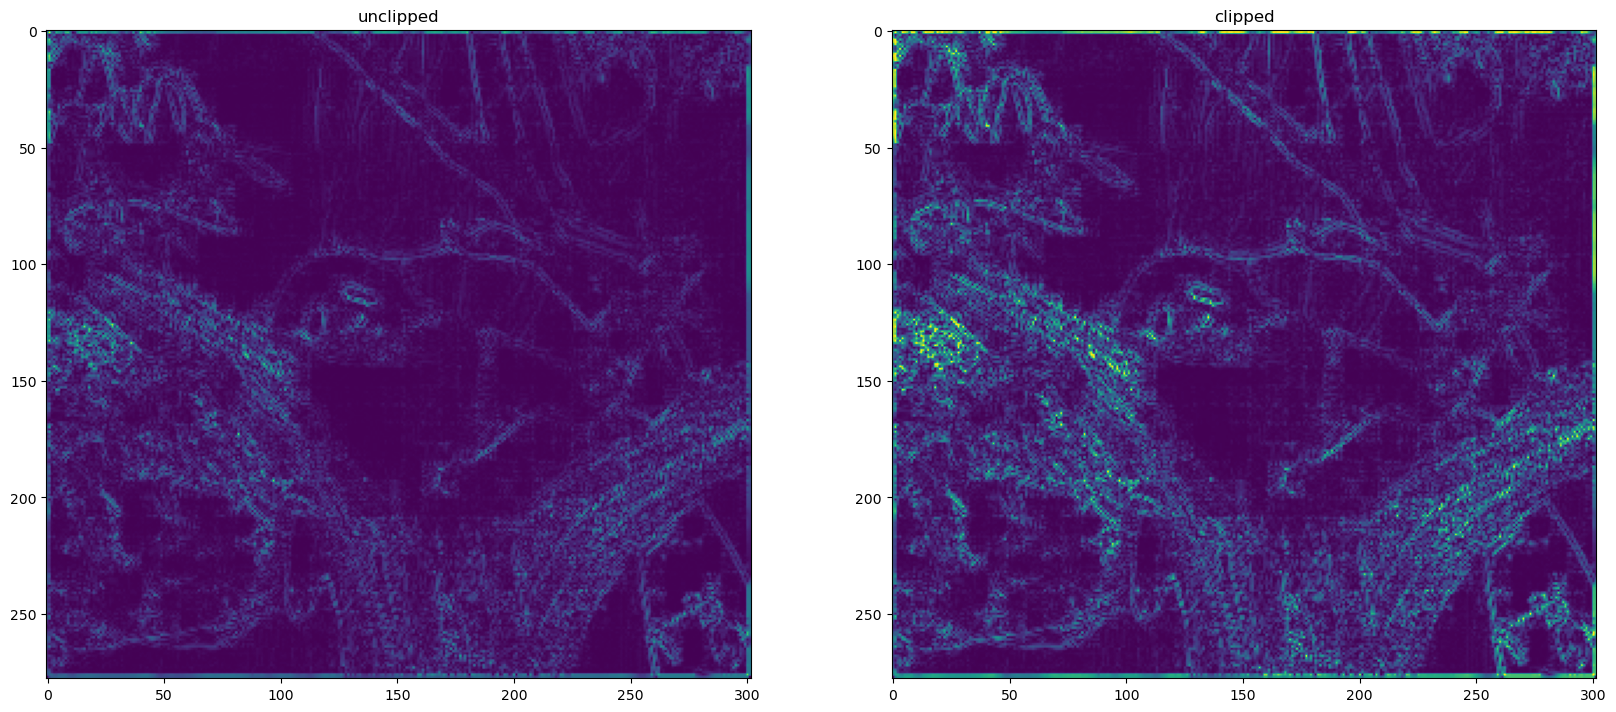

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(121) # Row X Columns X Index, 1, 2 ,1
plt.title(f"unclipped")
plt.imshow(lap_img)
plt.subplot(122)
plt.title("clipped")
plt.imshow(lap_img_clipped)

#### Solution apply all HPF mention above on the image:

In [24]:
# construct average blurring kernels used to smooth an image

# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
laplacian_edges = np.abs(convolve2d(img, laplacian))

# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

sobelx_edges = np.abs(convolve2d(img, sobelX))

# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

sobely_edges =  np.abs(convolve2d(img, sobelY))

# Credits to https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/


In [25]:
x, y = np.gradient(img)

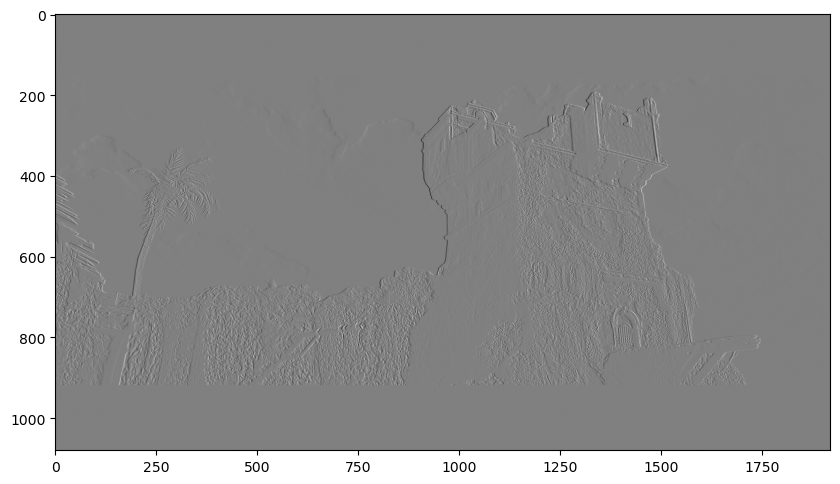

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(y, cmap="gray")

#### HPF Expected Result

Text(0.5, 1.0, 'Sobel X edge detection')

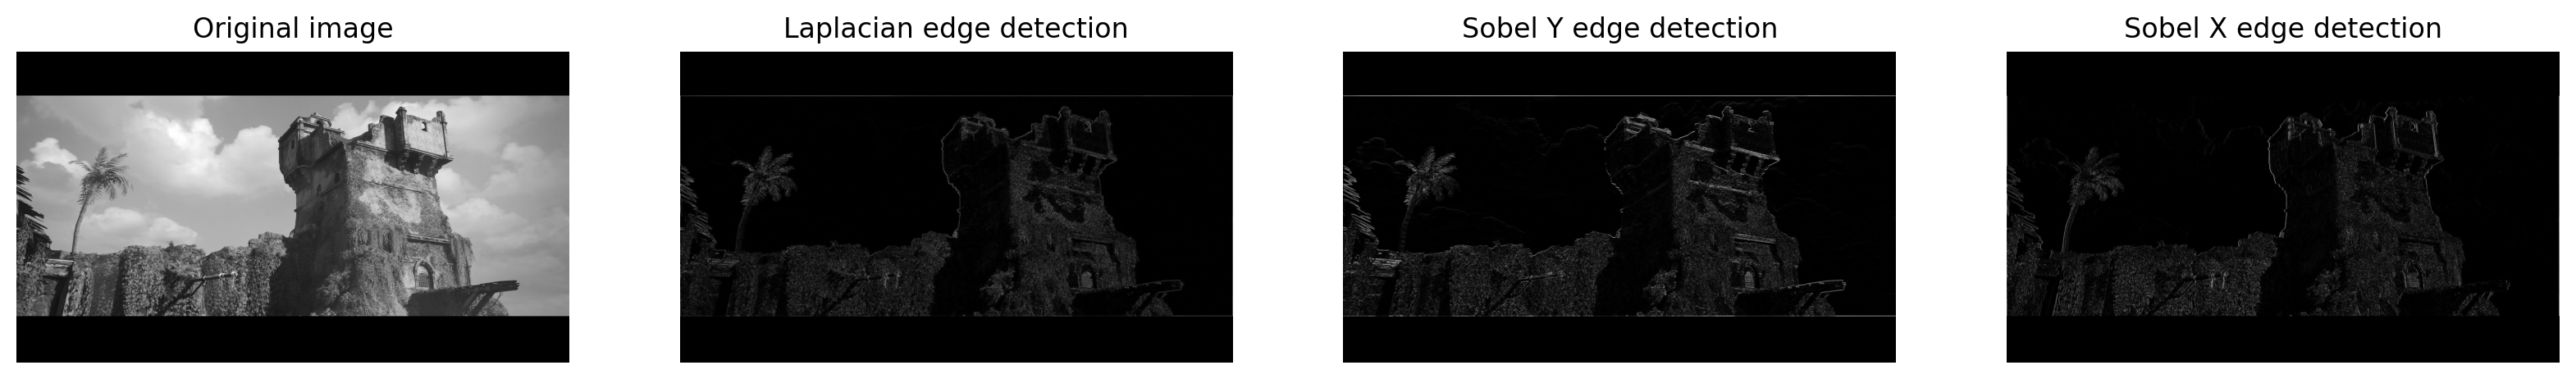

In [27]:
plt.figure(figsize=(20, 20), dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 4, 2)
plt.imshow(laplacian_edges, cmap="gray")
plt.axis("off")
plt.title("Laplacian edge detection")
plt.subplot(1, 4, 3)
plt.imshow(sobely_edges, cmap="gray")
plt.axis("off")
plt.title("Sobel Y edge detection")

plt.subplot(1, 4, 4)
plt.imshow(sobelx_edges, cmap="gray")
plt.axis("off")
plt.title("Sobel X edge detection")

### Sharpen: 
* In order to sharpen an image, it's edges are emphasized. 
* Implemented as follows 
*   delta + alpha * HPF:<br>
Example: use laplacian to sharp an image:
   \begin{bmatrix}0 & -1 & 0 \\
-1 & 5 & -1\\
0 & -1 & 0\\
\end{bmatrix}


#### Your Task: Sharpen the image using it's laplacian edges

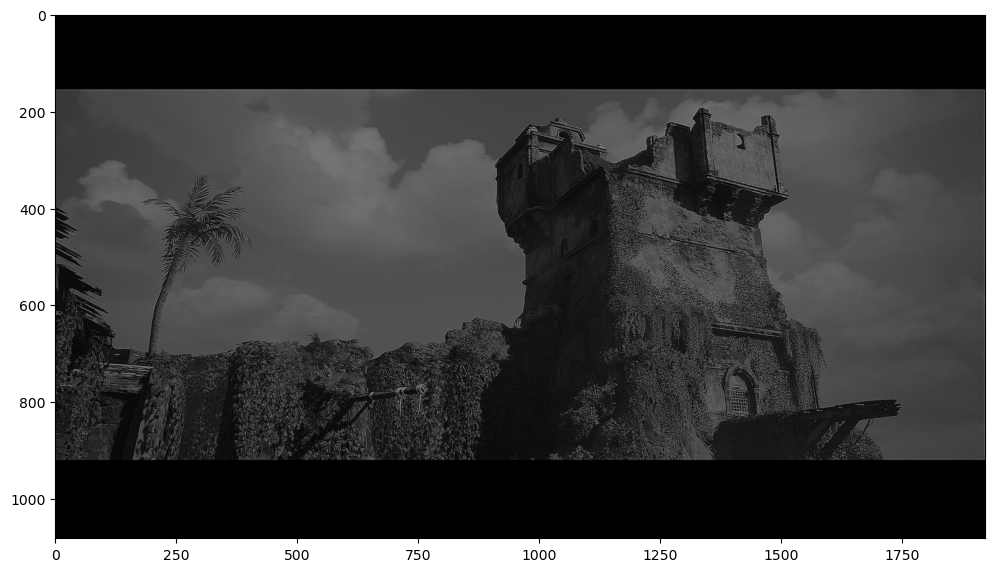

In [39]:
# Youre code goes here
# construct the Sobel y-axis kernel
Sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

SharpenImg =  np.abs(convolve2d(img, Sharpen))

plt.figure(figsize=(12, 8))
plt.imshow(SharpenImg, cmap="gray")

#### Solution: Sharpen the image using it's laplacian edges

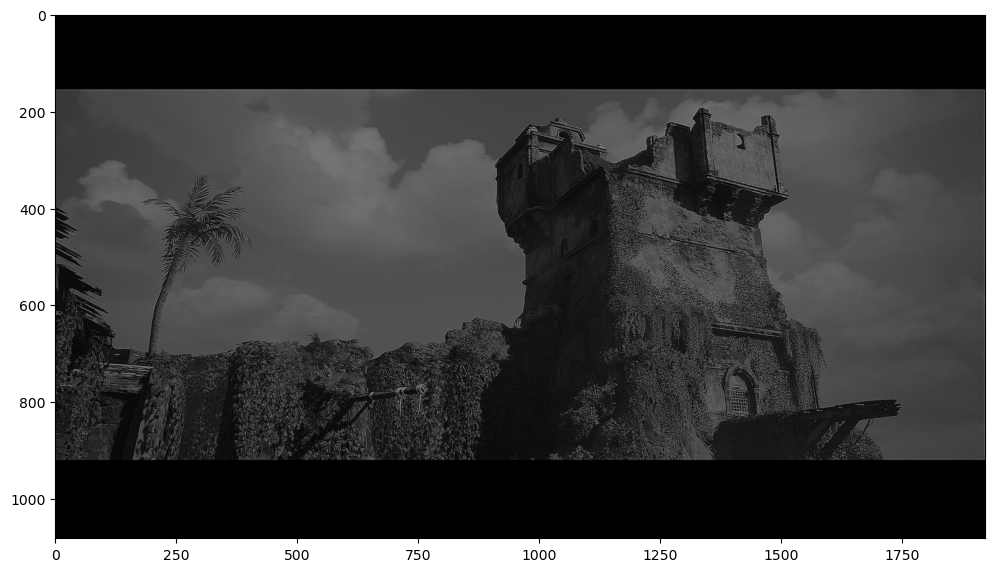

In [38]:
laplacian_sharpper = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int") / 4
sharpened_img = convolve2d(img, laplacian_sharpper)
sharpened_img = np.abs(sharpened_img)
plt.figure(figsize=(12, 8))
plt.imshow(sharpened_img, cmap="gray")

#### Sharpen Expected Result
 Sharpen Output 

max value: 138.5, min value: 0.0


Text(0.5, 1.0, 'sharpened_img: uint8')

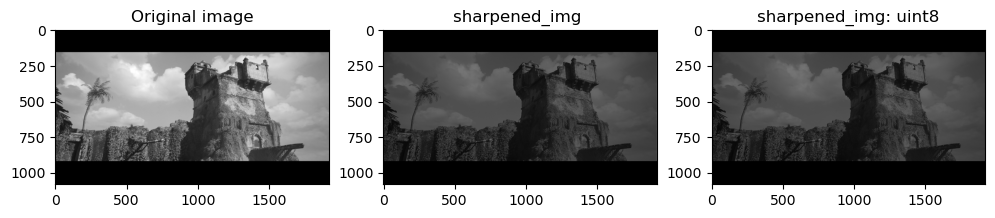

In [31]:
laplacian_sharpper = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int") / 4
sharpened_img = convolve2d(img, laplacian_sharpper)
sharpened_img = np.abs(sharpened_img)
print('max value: {}, min value: {}'.format(sharpened_img.max(),
                                            sharpened_img.min()))

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(sharpened_img, cmap="gray")
plt.title("sharpened_img ")
plt.subplot(1, 3, 3)
plt.imshow(sharpened_img.astype(np.uint8), cmap="gray")
plt.title("sharpened_img: uint8")

# MSE - Mean Squre Error 
Your Task:<br>
implement a function to calculate MSE between 2 images 


In [50]:
# Your code goes here

def myMse(img1,img2):
	img1 = img1.astype(np.uint8)
	img2 = img2.astype(np.uint8)
	return np.sum(img1*img1 -2*img1*img2 + img2*img2)/img1.size
	

#### Solution: MSE Implementation 

In [41]:
def mse (r_img, gt_img):
  r_img = r_img.astype(np.float)
  gt_img = gt_img.astype(np.float)
  return np.sum((gt_img*gt_img - 2 *r_img*gt_img +r_img*r_img))/r_img.size
  

In [42]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(lap_img, lap_img + 5)

myMse(lap_img,lap_img + 5)

25.0

#### MSE usage Example: 
mse (img, img+5 )  

## implenment conv2d 


Your Task: <br>
implement from scratch a function / class to perform 2 dimensional convolution


##### conv2d implementation 

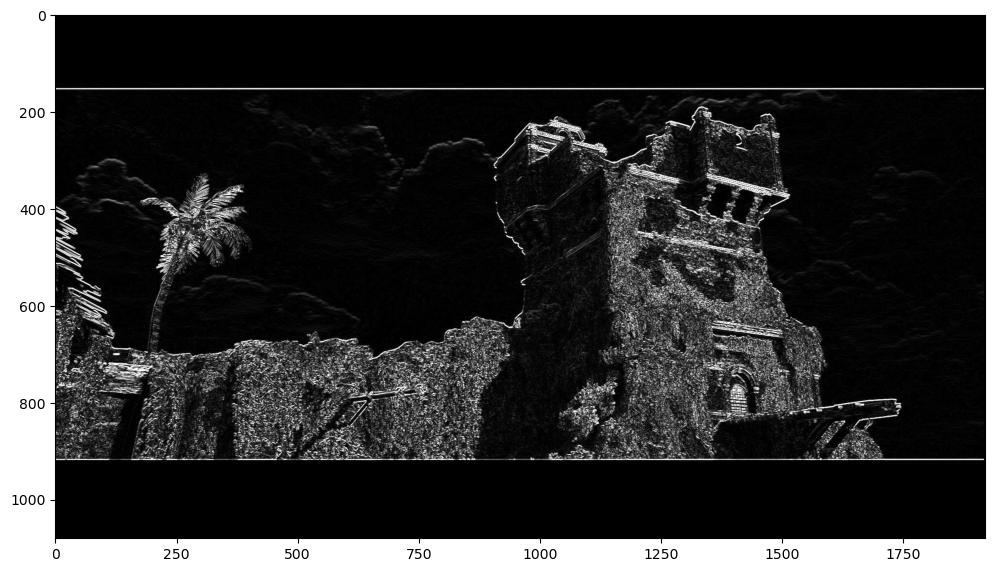

In [4]:

from myConv2d import MyConv2D
img = cv2.imread('./PIC1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
size = 5
kernel = np.ones((size, size), dtype="float") * (1.0 / (size**2))
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")
my_conv2d = MyConv2D(img, sobelY, 'same')



my_conv2d.my_conv_single_channel()
plt.figure(figsize=(12, 8))
plt.imshow(my_conv2d.img, cmap="gray")

# 
# res_uint8 = res.astype(np.uint8)
# res_uint8 = cv2.cvtColor(res.astype(np.uint8), cv2.COLOR_BGR2RGB)

#### my_conv2d demo output 

Text(0.5, 1.0, 'Result Image')

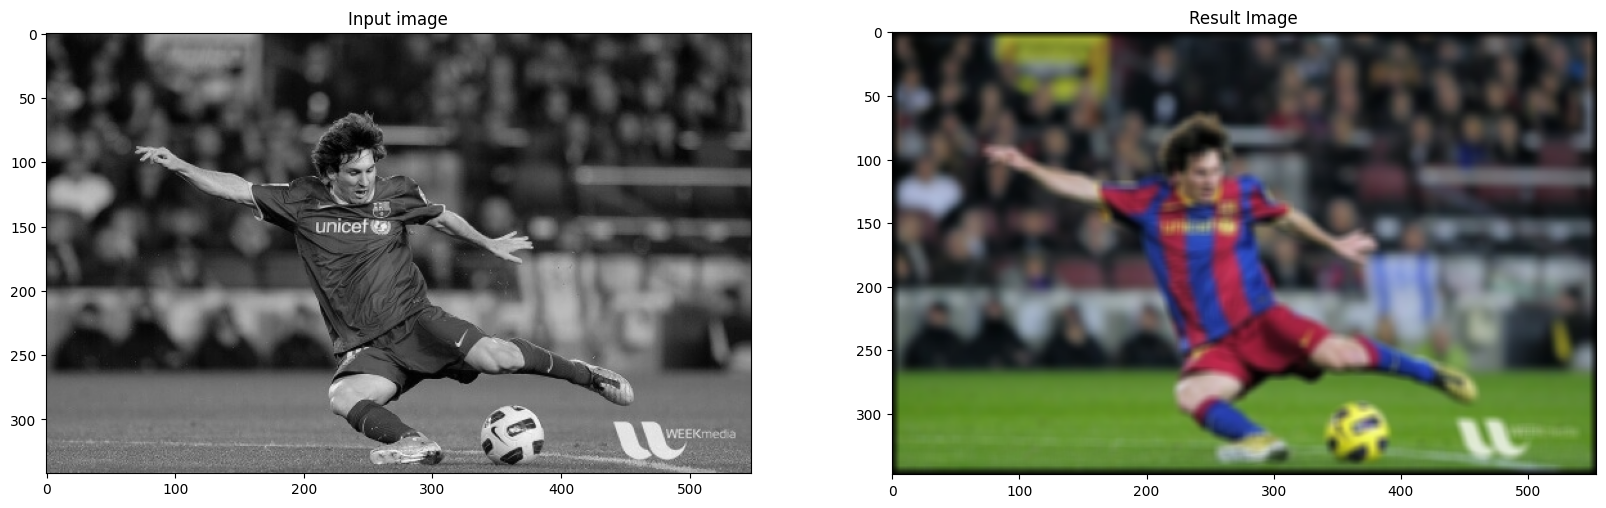

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20), dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input image')
plt.subplot(1, 2, 2)
plt.imshow(res_uint8)
plt.title('Result Image')